<h1><center>F1 RACE WINNER PREDICTOR</center></h1>
<h1><center>3. Exploratory Data Analysis</center></h1>

---

## In this Notebook:

In this Notebook you will find the Exploratory Data Analysis on the dataset.

1. [Feature Creation](#1.-Feature-Creation)  
    1.1. [Rain is a decisive weather feature](#1.1.-Rain-is-a-decisive-weather-feature)  
    1.2. [Create regulation era categorical feature](#1.2.-Create-regulation-era-categorical-feature)  
2. [Structure Investigation](#2.-Structure-Investigation)  
    2.1. [Structure of categorical features](#2.1.-Structure-of-categorical-features)  
    2.2. [Structure of numerical features](#2.2.-Structure-of-numerical-features)  
3. [Content Investigation](#3.-Content-Investigation)  
    3.1. [What are the most used circuits?](#3.1.-What-are-the-most-used-circuits?)  
    3.2. [What are the 2021 circuits where quali matters the most?](#3.2.-What-are-the-2021-circuits-where-quali-matters-the-most?)  
    3.3. [What is the best constructor?](#3.3.-What-is-the-best-constructor?)  
    3.4. [What driver has the best performance?](#3.4.-What-driver-has-the-best-performance?)  
    3.5. [Consistency is key, but worthless without good performance](#3.5.-Consistency-is-key,-but-worthless-without-good-performance)

The following step after 3. EDA is 4. Modeling.

---

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
df = pd.read_csv('data/df_no_dummies.csv')
df.columns

Index(['season', 'round', 'circuit_id', 'weather', 'weather_warm',
       'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy',
       'driver', 'nationality', 'constructor', 'grid', 'podium',
       'driver_points', 'driver_wins', 'driver_standings_pos',
       'constructor_points', 'constructor_wins', 'constructor_standings_pos',
       'qualifying_time', 'driver_age'],
      dtype='object')

In [3]:
# 'win' variable will be our target feature later in the modeling stage

df['win'] = df['podium'].apply(lambda x: 1 if x==1 else 0)

# 1. Feature Creation

##  1.1. Rain is a decisive weather feature

Many people call rain the great equalizer when it comes to F1 results. Drivers cannot go full throtle (and rely purely on the engine) and are forced to slow down and adapt their racing line, making the driver's skill more important to predict the result. As a consequence, wet conditions could help a good driver in a bad car to have a better-than-normal performance. This happened to George Russel (Williams team) in Spa in 2021, where he qualified 2nd. Other weather conditions are less important.

In [4]:
df['weather_wet'].value_counts(normalize=True)

0    0.895175
1    0.104825
Name: weather_wet, dtype: float64

## 1.2. Create regulation era categorical feature

In addition to our existing features, I consider important to include what F1 fans call the Regulation Era. This regulations dictated by the FIA dictate how teams should build their cars (type of engine, weight, aerodynamics, size, etc). In my opinion, this is a very important feature to take into account, as some teams can excel during a given era and go back to the midfield in another. An example of this is Mercedes undeniably dominating the V6 hybrid power unit era.

In [5]:
def era_split(value_in):
    if value_in<=1988:
        value_out = '1.5L_turbo'
    elif value_in<=1994:
        value_out = '3.5L_naturally_aspirated'
    elif value_in<=1999:
        value_out = '3L'
    elif value_in<=2005:
        value_out = 'V10'
    elif value_in<=2013:
        value_out = '2.4L_V8_engines'
    elif value_in<=2021:
        value_out = 'V6_hybrid'
    return value_out

In [6]:
df['reg_era'] = df.season.apply(era_split)
df[['reg_era']].value_counts(normalize=True)

reg_era                 
2.4L_V8_engines             0.213256
V6_hybrid                   0.207355
3.5L_naturally_aspirated    0.162384
1.5L_turbo                  0.157401
V10                         0.140947
3L                          0.118657
dtype: float64

# 2. Structure Investigation

## 2.1. Structure of categorical features

In [7]:
df.select_dtypes(include='object').describe()

,circuit_id,weather,driver,nationality,constructor,reg_era
count,15254,15254,15254,15254,15254,15254
unique,51,409,231,34,66,6
top,monza,Sunny,raikkonen,British,mclaren,2.4L_V8_engines
freq,883,1911,345,2229,1358,3253


## 2.2. Structure of numerical features

Let’s investigate how many unique values each numerical feature has. This process will give us some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

<AxesSubplot:title={'center':'Unique values per numerical feature'}>

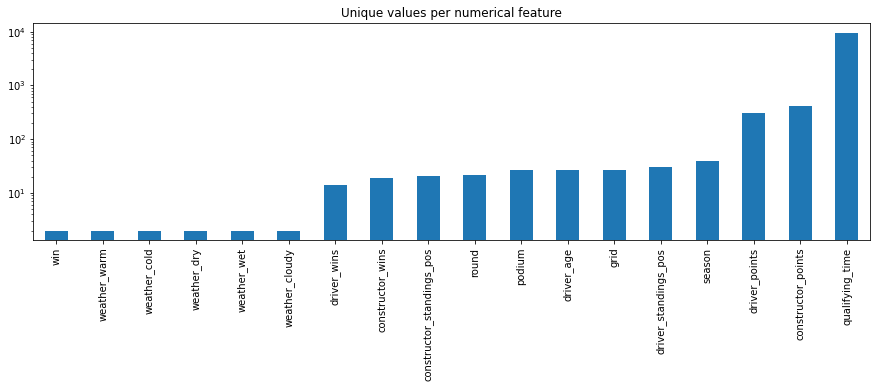

In [8]:
# How many unique values do the numerical features have?
unique_values = df.select_dtypes(include='number').nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4), title='Unique values per numerical feature')

###  Feature correlations

In [9]:
# Compute the correlation matrix
corr = df.corr().sort_values(by='podium', ascending=False)
corr

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age,win
podium,-0.137356,-0.019040,0.018865,0.022401,0.017565,-0.003475,-0.015369,0.476890,1.000000,-0.325382,-0.287633,0.349238,-0.319591,-0.317629,0.396616,0.110653,-0.050236,-0.349660
grid,-0.138914,-0.017125,0.019025,0.023725,0.018057,-0.003652,-0.013660,1.000000,0.476890,-0.422713,-0.375612,0.537643,-0.416826,-0.427382,0.616163,0.201751,-0.098277,-0.302983
constructor_standings_pos,-0.132017,0.165666,0.037945,0.032900,-0.012960,0.011962,-0.030679,0.616163,0.396616,-0.381201,-0.335540,0.772224,-0.392598,-0.411485,1.000000,0.120691,-0.094964,-0.225092
driver_standings_pos,-0.068463,0.202197,0.033072,0.015636,-0.009477,-0.003289,-0.028506,0.537643,0.349238,-0.374949,-0.345286,1.000000,-0.344236,-0.369661,0.772224,0.104107,-0.090015,-0.219910
qualifying_time,-0.136290,-0.020355,0.068379,-0.016320,-0.001472,-0.030496,-0.016625,0.201751,0.110653,-0.112637,-0.086427,0.104107,-0.113770,-0.098861,0.120691,1.000000,0.007575,-0.063434
weather_cold,-0.137877,-0.017801,-0.093332,1.000000,-0.076929,0.170502,0.047891,0.023725,0.022401,-0.042445,-0.006955,0.015636,-0.043041,-0.008796,0.032900,-0.016320,0.033622,-0.002988
weather_warm,-0.066730,0.031514,1.000000,-0.093332,-0.281848,-0.241783,-0.168331,0.019025,0.018865,-0.011302,0.003736,0.033072,-0.016987,0.005818,0.037945,0.068379,0.032068,-0.002396
weather_dry,-0.214487,-0.034746,-0.281848,-0.076929,1.000000,0.027990,-0.062851,0.018057,0.017565,-0.083791,-0.010257,-0.009477,-0.084016,-0.012268,-0.012960,-0.001472,0.040251,-0.002489
weather_wet,0.044658,-0.037044,-0.241783,0.170502,0.027990,1.000000,-0.003234,-0.003652,-0.003475,-0.002860,-0.006532,-0.003289,-0.004138,-0.008715,0.011962,-0.030496,-0.007669,0.000527
weather_cloudy,0.094512,-0.048780,-0.168331,0.047891,-0.062851,-0.003234,1.000000,-0.013660,-0.015369,0.013645,-0.004916,-0.028506,0.012117,-0.007432,-0.030679,-0.016625,-0.023932,0.001921


### Observations about correlations

Weather features are not very correlated with final race position. I will drop them all but 'weather_wet' as I will use it for an analysis further down below.

In [10]:
df.drop(columns=['weather_warm','weather_cold', 'weather_dry', 'weather_cloudy'], inplace=True)

'reg_era' could be a useful categorical variable for the modeling stage later. We must be careful with multicollinearity.

### Final correlation matrix

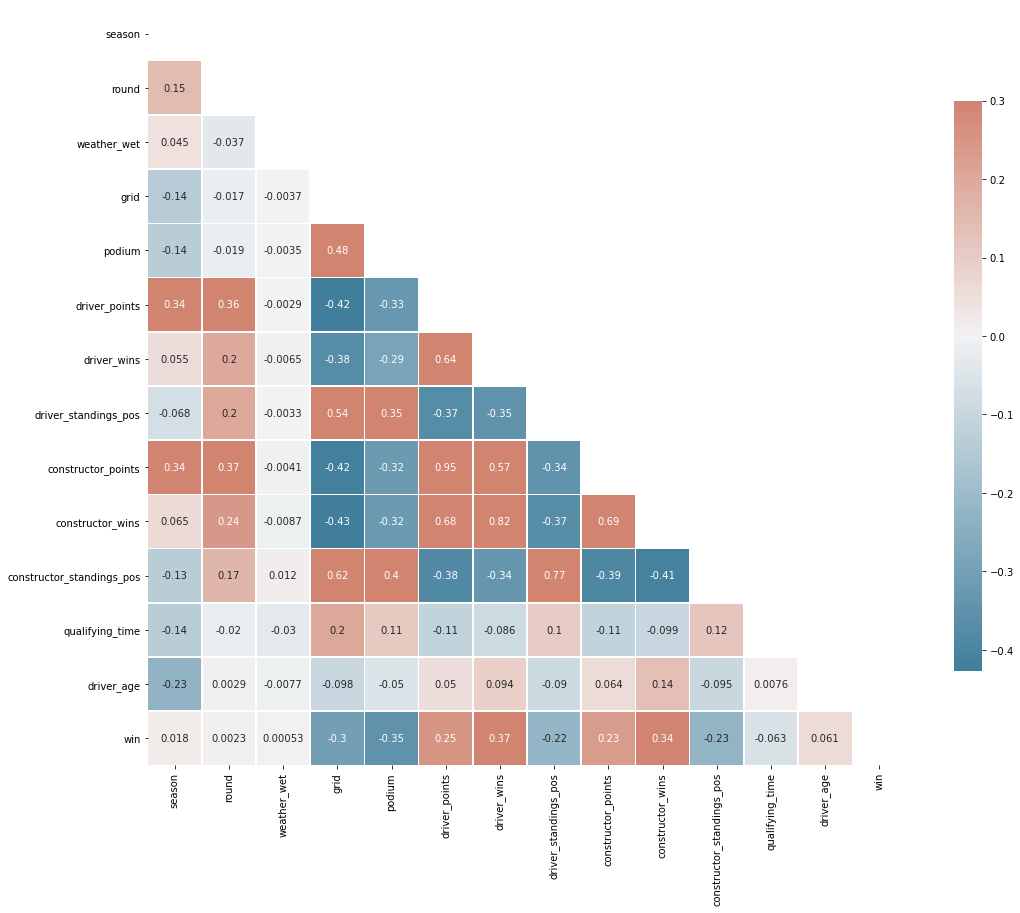

In [11]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True,  mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.savefig('images/correlation_matrix.png')

# 3. Content Investigation

## 3.1. What are the most used circuits?

In [12]:
circuit_count = df.groupby(['circuit_id'])['circuit_id'].count().sort_values(ascending=False)/20 # Average of 20 drivers per race
circuit_count.head(10) # most used circuits in F1 history

circuit_id
monza             44.15
silverstone       42.30
monaco            41.55
spa               40.60
hungaroring       40.10
villeneuve        39.65
suzuka            34.50
hockenheimring    34.50
interlagos        33.95
catalunya         33.95
Name: circuit_id, dtype: float64

## 3.2. What are the 2021 circuits where quali matters the most?

In [13]:
grid_podium_corr = df.groupby('circuit_id')[['grid', 'podium']].corr().iloc[0::2,-1].sort_values(ascending=False)
grid_podium_corr = pd.DataFrame(grid_podium_corr).reset_index()

circuit_2021_list = list(df[df['season'] == 2021]['circuit_id'].unique())

grid_podium_corr_2021 = grid_podium_corr[grid_podium_corr.circuit_id.isin(circuit_2021_list)].reset_index(drop=True)
grid_podium_corr_2021

,circuit_id,level_1,podium
0,portimao,grid,0.827068
1,istanbul,grid,0.711489
2,jeddah,grid,0.687218
3,bahrain,grid,0.677431
4,yas_marina,grid,0.667388
5,losail,grid,0.609023
6,catalunya,grid,0.593835
7,americas,grid,0.587515
8,sochi,grid,0.586554
9,hungaroring,grid,0.528649


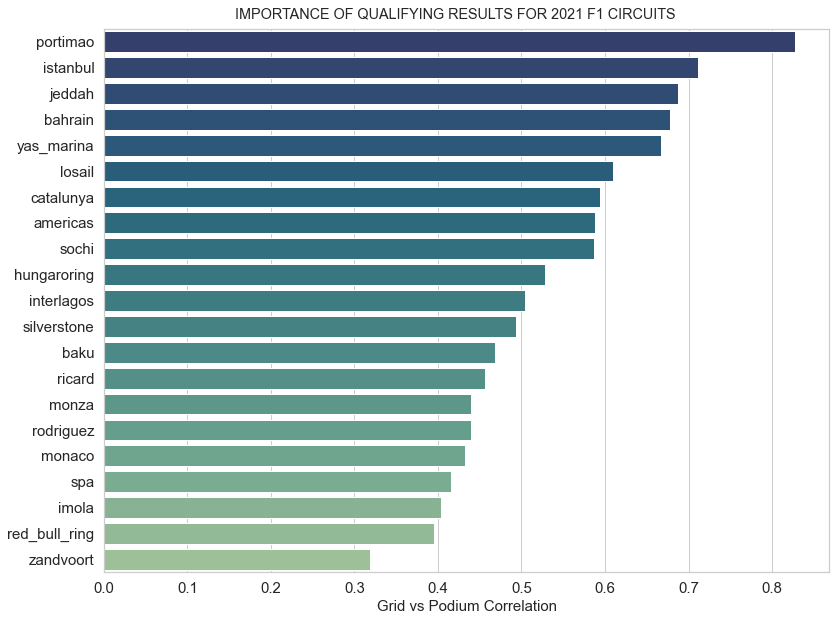

In [86]:
# plot highest grid-podium correlations

plt.figure(figsize=(13,10))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=grid_podium_corr_2021, x='podium', y='circuit_id', palette='crest_r')
ax.set_xlabel ("Grid vs Podium Correlation", fontsize=15)
ax.set_ylabel ('') # drop y-axis label because it's distracting
ax.tick_params(labelsize=15)

plt.suptitle("IMPORTANCE OF QUALIFYING RESULTS FOR 2021 F1 CIRCUITS", y=0.91)

plt.savefig('images/podium-grid_correlation.png')

plt.show()

## 3.3. What is the best constructor? 

In [15]:
# account for team rebranding by replacing old names by new names

df.loc[df.constructor == "toro_rosso", "constructor"] = "alphatauri"
df.loc[df.constructor == "renault", "constructor"] = "alpine"
df.loc[df.constructor == "racing_point", "constructor"] = "aston_martin"
df.loc[df.constructor == "force_india", "constructor"] = "aston_martin"

constr_2021_list = list(df[df['season'] == 2021]['constructor'].unique()) # list of all 2021 constructors
df_2021_constr = df[df['constructor'].isin(constr_2021_list)] # list of all drivers that drove for those consturctors in 2021

In [16]:
# historically best constructor out of those competing in 2021 season

perf_constr_group = df.groupby(['constructor'])[['podium']].mean().sort_values(by=['podium'], ascending=True).reset_index()
perf_constr_group[perf_constr_group['constructor'].isin(constr_2021_list)]

,constructor,podium
1,mercedes,5.739316
2,red_bull,7.779180
3,ferrari,7.951363
5,mclaren,9.010309
7,alpine,10.615160
8,williams,10.669139
12,aston_martin,11.533708
18,alphatauri,13.178631
24,alfa,14.237624
26,haas,14.333333


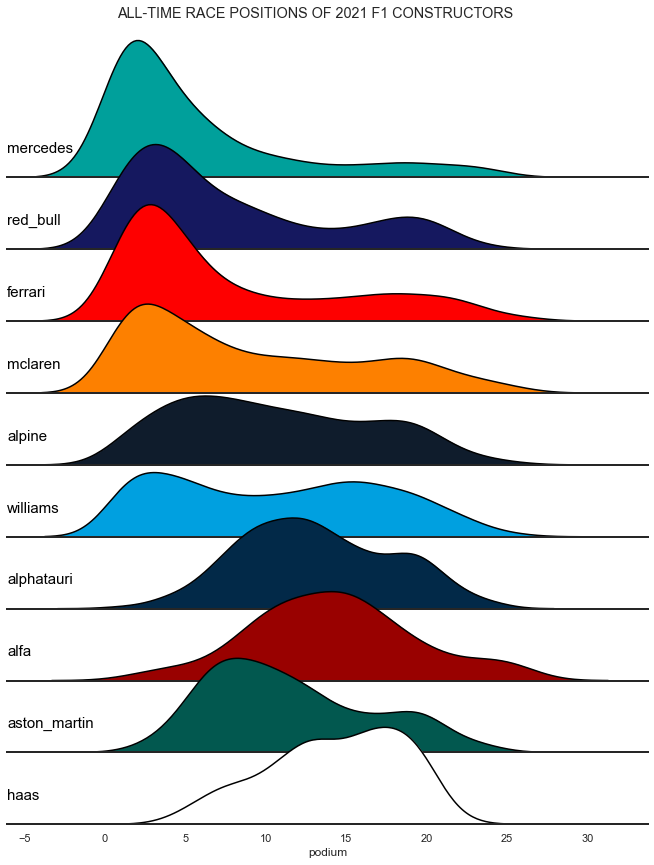

In [91]:
# plot

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

row_order =   ['mercedes', 'red_bull', 'ferrari', 'mclaren', 'alpine', 'williams', 'alphatauri', 'alfa', 'aston_martin', 'haas']
hex_colors = ['#00a09b', '#15185f', '#fe0000', '#fd8000', '#0f1c2c','#00a0e0' , '#022948', '#990100', '#02584f', '#ffffff']
palette = {row_order[i]:hex_colors[i] for i in range(len(row_order))}

g = sns.FacetGrid(df_2021_constr, row='constructor', row_order=row_order, palette=palette, hue='constructor', aspect=8, height=1.2)

g.map_dataframe(sns.kdeplot, x='podium', fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x='podium', color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=15, ha="left", va="center", transform=ax.transAxes)
    
g.map(label, 'podium')

g.fig.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

plt.suptitle("ALL-TIME RACE POSITIONS OF 2021 F1 CONSTRUCTORS", y=1)

plt.savefig('images/all_time_race_pos_by_constructor_2021.png')

## 3.4. What driver has the best performance?

### Overall

In [18]:
perf_all_group = df.groupby(['driver'])[['podium']].mean().sort_values(by=['podium'], ascending=True)
perf_all_group.head(10)

,podium
driver,
hamilton,4.712281
prost,6.379747
vettel,6.714286
max_verstappen,6.876812
michael_schumacher,6.885993
bottas,6.977273
senna,8.136646
rosberg,8.248780
alonso,8.346269


In [52]:
perf_all = df[['driver', 'season', 'round', 'podium']].copy()
perf_all

,driver,season,round,podium
0,keke_rosberg,1983,1,15
1,prost,1983,1,6
2,tambay,1983,1,4
3,piquet,1983,1,1
4,warwick,1983,1,7
...,...,...,...,...
15249,vettel,2021,22,11
15250,latifi,2021,22,16
15251,russell,2021,22,18
15252,raikkonen,2021,22,19


### Dry conditions

In [53]:
df_dry

,season,round,circuit_id,weather,weather_wet,driver,nationality,constructor,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age,win,reg_era
0,1983,1,jacarepagua,Dry,0,keke_rosberg,Finnish,williams,1,15,0,0,0,0,0,0,0.000,34,0,1.5L_turbo
1,1983,1,jacarepagua,Dry,0,prost,French,alpine,2,6,0,0,0,0,0,0,0.146,28,0,1.5L_turbo
2,1983,1,jacarepagua,Dry,0,tambay,French,ferrari,3,4,0,0,0,0,0,0,0.232,33,0,1.5L_turbo
3,1983,1,jacarepagua,Dry,0,piquet,Brazilian,brabham,4,1,0,0,0,0,0,0,0.588,30,1,1.5L_turbo
4,1983,1,jacarepagua,Dry,0,warwick,British,toleman,5,7,0,0,0,0,0,0,0.680,28,0,1.5L_turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15249,2021,22,yas_marina,Clear,0,vettel,German,aston_martin,15,11,43,0,12,77,0,7,2.196,34,0,V6_hybrid
15250,2021,22,yas_marina,Clear,0,latifi,Canadian,williams,16,16,7,0,17,23,0,8,2.229,26,0,V6_hybrid
15251,2021,22,yas_marina,Clear,0,russell,British,williams,17,18,16,0,15,23,0,8,2.314,23,0,V6_hybrid
15252,2021,22,yas_marina,Clear,0,raikkonen,Finnish,alfa,18,19,10,0,16,13,0,9,2.670,42,0,V6_hybrid


In [56]:
df_dry = df[df['weather_wet'] == 0]

perf_dry_group = df_dry.groupby(['driver'])[['weather_wet','podium']].mean().sort_values(by=['podium'], ascending=True)
perf_dry_group = perf_dry_group.reset_index(inplace=False)
perf_dry_group

,driver,weather_wet,podium
0,hamilton,0.0,4.725100
1,prost,0.0,6.144828
2,vettel,0.0,6.550000
3,bottas,0.0,6.793750
4,michael_schumacher,0.0,6.802974
...,...,...,...
225,chiesa,0.0,21.000000
226,lotterer,0.0,22.000000
227,raphanel,0.0,23.000000
228,noda,0.0,24.000000


### Wet conditions

In [57]:
df_wet = df[df['weather_wet'] == 1]

perf_wet_group = df_wet.groupby(['driver'])[['weather_wet','podium']].mean().sort_values(by=['podium'], ascending=True)
perf_wet_group = perf_wet_group.reset_index(inplace=False)
perf_wet_group.head(10)

,driver,weather_wet,podium
0,senna,1.0,3.000000
1,hamilton,1.0,4.617647
2,sullivan,1.0,5.000000
3,max_verstappen,1.0,5.384615
4,albon,1.0,6.000000
5,baldi,1.0,6.000000
6,bellof,1.0,6.000000
7,angelis,1.0,7.000000
8,serra,1.0,7.000000
9,sainz,1.0,7.285714


### Performace delta of the rain

This is how the presence of rain affects the performance of the top 20 drivers in dry conditions. Drivers like Senna, Webber and Gasly see an advantage in the presence of rain, whereas Prost, Vettel and Barrichello are hindered by it on average.

We can also infer that, not only good drivers tend to do relatively better in the wet, but also 'decent' drivers with underperforming cars see the rain as an opportunity. This is because drivers cannot go full push in the wet, making the difference in car performance smaller. This happened to George Russel in Spa in 2021, when he qualified 2nd with the slowest car... In the wet.

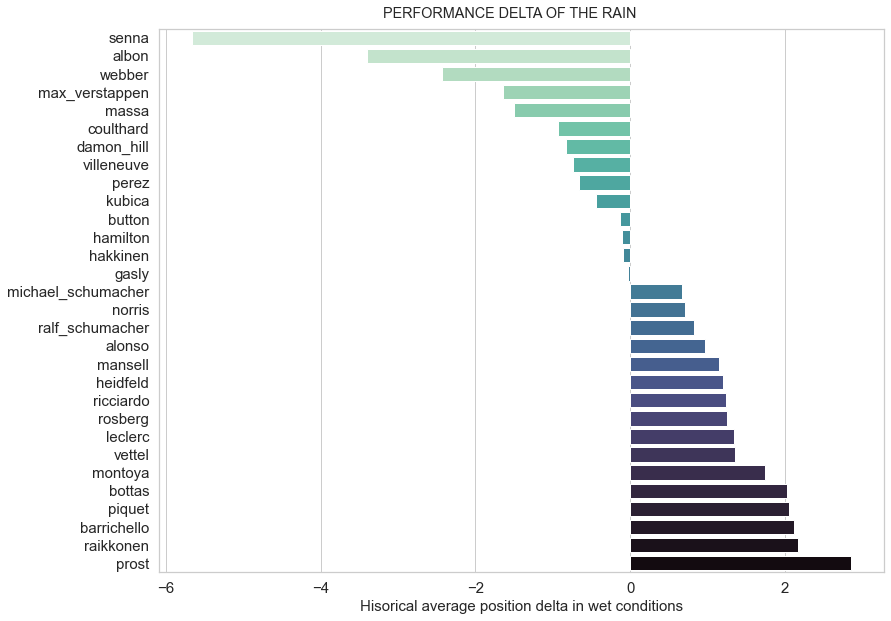

In [84]:
perf_merged = perf_dry_group.merge(perf_wet_group, how='inner', left_on='driver', right_on='driver', suffixes=('_dry', '_wet')).drop(columns=['weather_wet_dry', 'weather_wet_wet'], axis=1)
perf_merged['rain_delta'] = perf_merged['podium_wet'] - perf_merged['podium_dry']
top_20_dry = perf_merged.head(30).sort_values(by='rain_delta', ascending=True).drop(columns=['podium_dry', 'podium_wet'])
#top_20_dry['rain_delta'] = top_20_dry['rain_delta']*-1

# plot

plt.figure(figsize=(13,10))
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=top_20_dry, x='rain_delta', y='driver', palette='mako_r')
ax.set_xlabel ('Hisorical average position delta in wet conditions', fontsize=15) 
ax.set_ylabel ('') # drop y-axis label because it's distracting
ax.tick_params(labelsize=15)

plt.suptitle("PERFORMANCE DELTA OF THE RAIN", y=0.91)
plt.savefig('images/performance_delta_of_rain.png')
plt.show()

## 3.5. Consistency is key, but performance has to be good

### Driver consistency

In [92]:
# all time standard deviation of results for the 2021 season drivers

std_drivers = df.groupby(['driver'])['podium'].std().sort_values().reset_index() # calc std per driver
std_drivers = std_drivers.merge(df, how='inner', left_on='driver', right_on='driver', suffixes=('_std', '')) # join to obtain 2021 drivers
std_drivers = std_drivers[['driver', 'podium_std', 'season']] # pick out 2021 drivers
std_drivers = std_drivers[std_drivers['season'] == 2021].groupby(['driver'])[['podium_std']].mean().sort_values(by='podium_std', ascending=True) # regroup
std_drivers

,podium_std
driver,
mazepin,1.729299
mick_schumacher,2.136064
giovinazzi,3.027538
latifi,3.100014
russell,3.255315
stroll,4.375890
tsunoda,4.533791
norris,4.536102
ocon,4.834884


### Constructor consistency

In [93]:
# all time standard deviation of results for the 2021 season constructors

std_constructors = df.groupby(['constructor'])['podium'].std().sort_values().reset_index() # calc std per constructor
std_constructors = std_constructors.merge(df, how='inner', left_on='constructor', right_on='constructor', suffixes=('_std', '')) # join to obtain 2021 constructors
std_constructors = std_constructors[['constructor', 'podium_std', 'season']] # pick out 2021 drivers
std_constructors = std_constructors[std_constructors['season'] == 2021].groupby(['constructor'])[['podium_std']].mean().sort_values(by='podium_std', ascending=True) # regroup
std_constructors

,podium_std
constructor,
haas,4.164019
alphatauri,4.706056
aston_martin,5.027671
alfa,5.098334
mercedes,5.982522
alpine,6.000779
red_bull,6.316193
williams,6.657739
mclaren,6.947951
